# Task 7 - Hotel Booking Cancellations Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Clean the data

In [ ]:
df = pd.read_csv('bookings.txt')

In [3]:
df.head()

,hotel,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,canceled
0,City Hotel,February,9,21,1,0,2,BB,ESP,Online TA,TA/TO,A,A,0,No Deposit,Transient,91.0,0,1,1
1,City Hotel,July,29,17,1,0,2,SC,SWE,Online TA,TA/TO,A,A,0,No Deposit,Transient,140.0,0,2,1
2,City Hotel,July,29,22,1,1,2,HB,DEU,Offline TA/TO,TA/TO,A,A,0,No Deposit,Transient-Party,122.4,0,1,0
3,City Hotel,March,11,9,0,3,2,BB,USA,Online TA,TA/TO,B,B,0,No Deposit,Transient,77.5,0,2,1
4,City Hotel,September,38,11,1,0,2,SC,GBR,Online TA,TA/TO,A,A,0,No Deposit,Transient,89.0,0,2,0


In [4]:
df.shape

(5000, 20)

In [5]:
df.columns

Index(['hotel', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'canceled'],
      dtype='object')

In [6]:
df.dtypes

hotel                           object
arrival_date_month              object
arrival_date_week_number         int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
canceled                         int64
dtype: object

In [13]:
df = df.convert_dtypes()


In [14]:
df.dtypes

hotel                          string[python]
arrival_date_month             string[python]
arrival_date_week_number                Int64
arrival_date_day_of_month               Int64
stays_in_weekend_nights                 Int64
stays_in_week_nights                    Int64
adults                                  Int64
meal                           string[python]
country                        string[python]
market_segment                 string[python]
distribution_channel           string[python]
reserved_room_type             string[python]
assigned_room_type             string[python]
booking_changes                         Int64
deposit_type                   string[python]
customer_type                  string[python]
adr                                   Float64
required_car_parking_spaces             Int64
total_of_special_requests               Int64
canceled                                Int64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   string 
 1   arrival_date_month           5000 non-null   string 
 2   arrival_date_week_number     5000 non-null   Int64  
 3   arrival_date_day_of_month    5000 non-null   Int64  
 4   stays_in_weekend_nights      5000 non-null   Int64  
 5   stays_in_week_nights         5000 non-null   Int64  
 6   adults                       5000 non-null   Int64  
 7   meal                         5000 non-null   string 
 8   country                      5000 non-null   string 
 9   market_segment               5000 non-null   string 
 10  distribution_channel         5000 non-null   string 
 11  reserved_room_type           5000 non-null   string 
 12  assigned_room_type           5000 non-null   string 
 13  booking_changes   

In [20]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
arrival_date_week_number,5000.0,27.0618,13.531585,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,5000.0,15.7086,8.791311,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,5000.0,0.9066,0.971012,0.0,0.0,1.0,2.0,8.0
stays_in_week_nights,5000.0,2.4898,1.826955,0.0,1.0,2.0,3.0,20.0
adults,5000.0,1.863,0.482781,0.0,2.0,2.0,2.0,4.0
booking_changes,5000.0,0.219,0.673446,0.0,0.0,0.0,0.0,18.0
adr,5000.0,102.669692,48.879693,0.0,70.0,94.5,126.0,382.0
required_car_parking_spaces,5000.0,0.065,0.248168,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,5000.0,0.5742,0.793864,0.0,0.0,0.0,1.0,5.0
canceled,5000.0,0.3652,0.481534,0.0,0.0,0.0,1.0,1.0


In [17]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
arrival_date_week_number,5000.0,27.0618,13.531585,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,5000.0,15.7086,8.791311,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,5000.0,0.9066,0.971012,0.0,0.0,1.0,2.0,8.0
stays_in_week_nights,5000.0,2.4898,1.826955,0.0,1.0,2.0,3.0,20.0
adults,5000.0,1.863,0.482781,0.0,2.0,2.0,2.0,4.0
booking_changes,5000.0,0.219,0.673446,0.0,0.0,0.0,0.0,18.0
adr,5000.0,102.669692,48.879693,0.0,70.0,94.5,126.0,382.0
required_car_parking_spaces,5000.0,0.065,0.248168,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,5000.0,0.5742,0.793864,0.0,0.0,0.0,1.0,5.0
canceled,5000.0,0.3652,0.481534,0.0,0.0,0.0,1.0,1.0


## Merge with a data set for continent

We load a dataset with the continent associated with the country ISO Code in order to do add the variable continent.

Source : https://www.kaggle.com/datasets/aungdev/country-codes-and-continents?resource=download

In [ ]:
df_cont =pd.read_csv('country_codes_and_continents.csv', sep= ',')

In [23]:
df_cont.head(10)

,Country,Country Code,Continent
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania
5,Andorra,AND,Europe
6,Angola,AGO,Africa
7,Anguilla,AIA,Americas
8,Antarctica,ATA,NaN
9,Antigua and Barbuda,ATG,Americas


In [24]:
df_merged = df.merge(df_cont, left_on = 'country' , right_on = 'Country Code')

In [25]:
df_merged['country'].describe()

count     4941
unique      89
top        PRT
freq      2048
Name: country, dtype: object

59 missing values. We have to find it

In [26]:
missing_countries = df.loc[~df['country'].isin(df_cont['Country Code']), 'country'].unique()
print(missing_countries)

<StringArray>
['CN']
Length: 1, dtype: string


In [27]:
'CN' in df_cont['Country Code'].values


False

In [28]:
'CN' in df['country'].values


True

In [29]:
'CHN' in df_cont['Country Code'].values

True

In [30]:

'CHN' in df['country'].values

True

In [31]:
### China not encoded in the same way in the 2 datasets. Replace the CHN by CN in df_cont

In [32]:
df['country'] = df['country'].replace('CN', 'CHN')


In [33]:
df_merged = df.merge(df_cont, left_on = 'country' , right_on = 'Country Code')

In [34]:
df_merged['country'].describe()

count     5000
unique      89
top        PRT
freq      2048
Name: country, dtype: object

0 missing values for each columns of the dataset

## What is the proportions of cancelations in the dataset

In [35]:
Cancelations = df['canceled']

In [36]:
Cancelations.head()

0    1
1    1
2    0
3    1
4    0
Name: canceled, dtype: Int64

In [37]:
df.groupby('required_car_parking_spaces')['canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
required_car_parking_spaces,,,,,,,,
0,4677.0,0.390421,0.487897,0.0,0.0,0.0,1.0,1.0
1,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
Cancelations.value_counts(normalize=True, )

canceled
0    0.6348
1    0.3652
Name: proportion, dtype: Float64

In [39]:
print('The proportion of Cancelations in the data set is equal to',36.52,'%')

The proportion of Cancelations in the data set is equal to 36.52 %


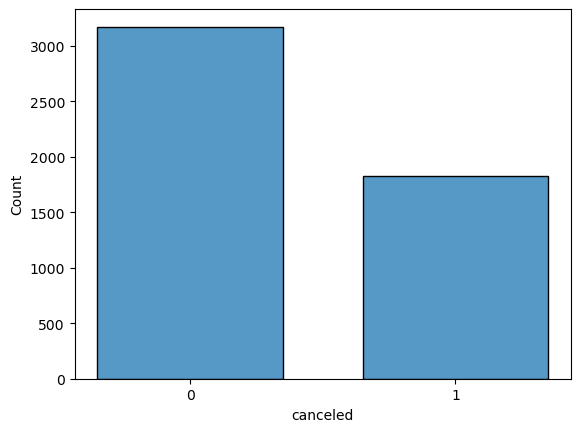

In [40]:
sns.histplot(data=df, x="canceled", discrete=True, shrink=0.7)
plt.xticks([0, 1])
plt.show()

## How are the different variables distributed in the dataset ?

In [41]:
# choose hotel, market_segments, customer,type

In [42]:
df['customer_type'].value_counts()

customer_type
Transient          3725
Transient-Party    1083
Contract            171
Group                21
Name: count, dtype: Int64

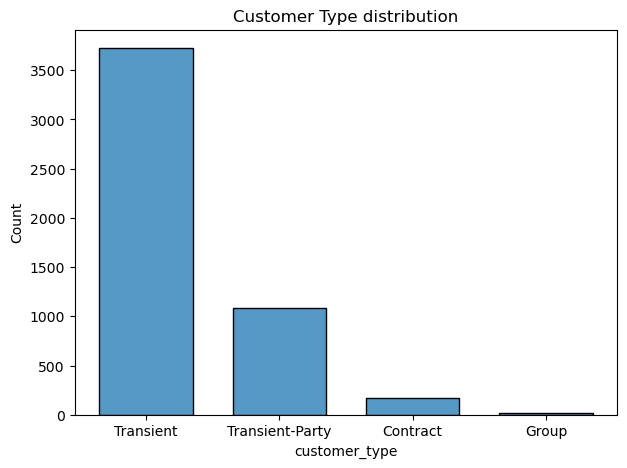

In [43]:
# Plot Customer type distribution
fig, ax = plt.subplots(figsize=[7,5])
sns.histplot(data=df, x="customer_type", discrete=True, shrink=0.7)
ax.set(title= 'Customer Type distribution')
plt.show()

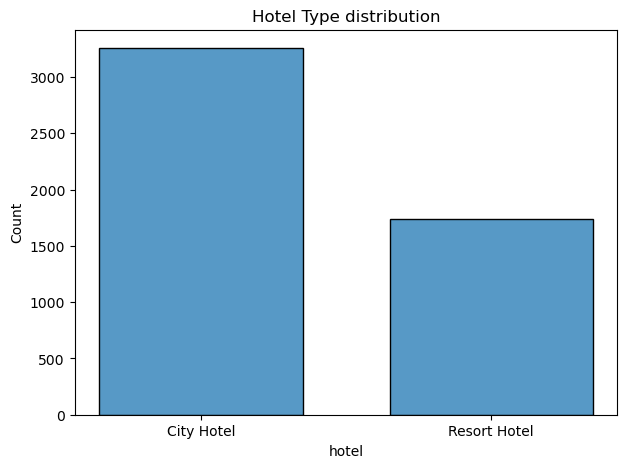

In [44]:
# Plot Hotel type distribution

fig, ax = plt.subplots(figsize=[7,5])
sns.histplot(data=df, x="hotel", discrete=True, shrink=0.7)
ax.set(title= 'Hotel Type distribution')
plt.show()

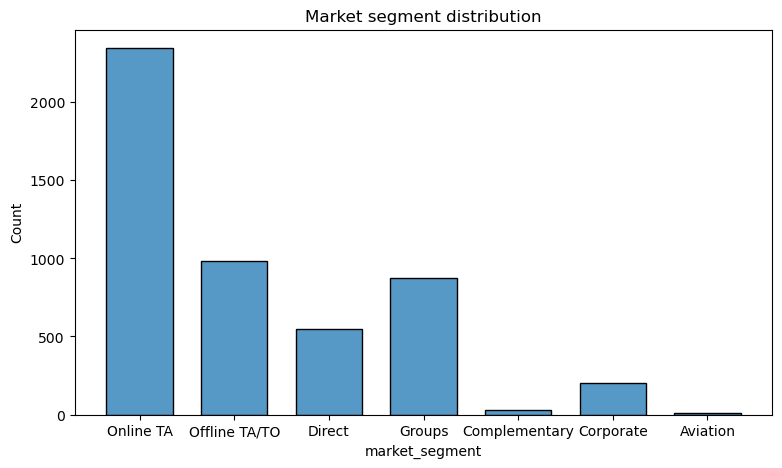

In [45]:
# Plot Market Segment distribution
fig, ax = plt.subplots(figsize=[9,5])
sns.histplot(data=df, x="market_segment", discrete=True, shrink=0.7)
ax.set(title= 'Market segment distribution')
plt.show()

In [46]:
# Coding a loop for ploting all the distributions

"""
for column in df.columns:
    fig, ax = plt.subplots(figsize=[14,5])
    sns.histplot(data=df, x=column, discrete=True, shrink=0.7)
    ax.set(title=f"{column} distribution") 
    plt.show() 
    """
# Useful to see what histograms could be interesting 



'\nfor column in df.columns:\n    fig, ax = plt.subplots(figsize=[14,5])\n    sns.histplot(data=df, x=column, discrete=True, shrink=0.7)\n    ax.set(title=f"{column} distribution") \n    plt.show() \n    '

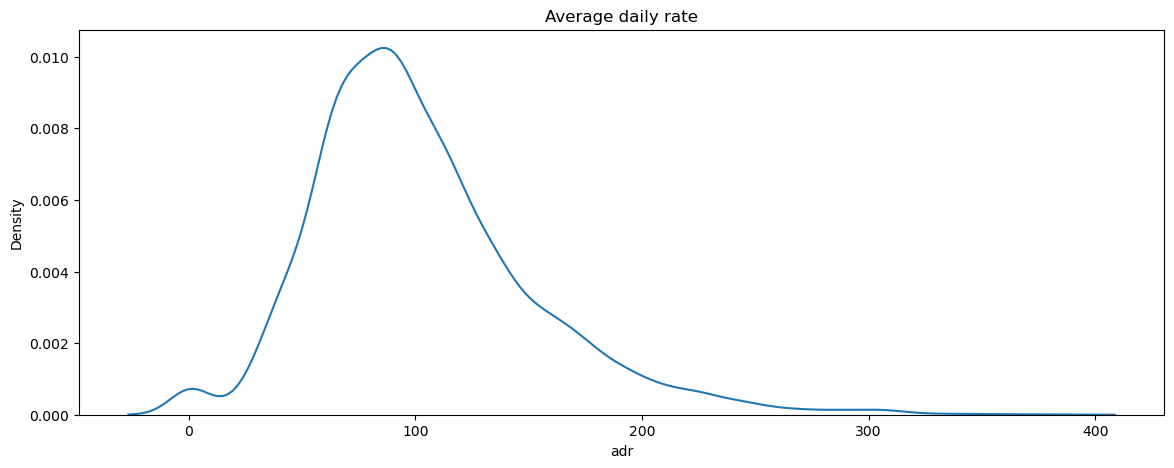

In [47]:
### Average daily rate distributiion
fig, ax = plt.subplots(figsize=[14,5])
sns.kdeplot(data=df, x="adr")
ax.set(title= 'Average daily rate')
plt.show()

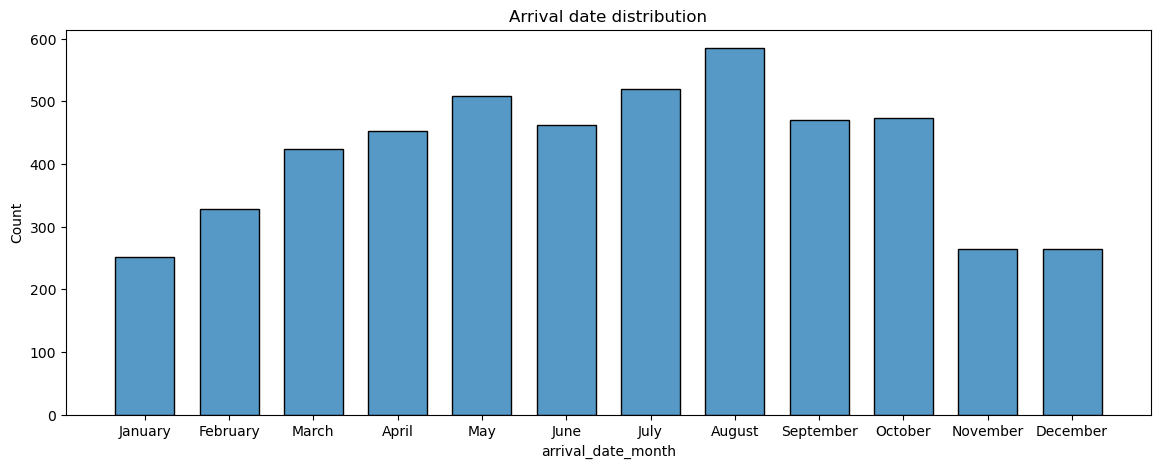

In [48]:
# Order months to display them in calendar order

mois_ordre = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=mois_ordre, ordered=True)


fig, ax = plt.subplots(figsize=[14,5])
sns.histplot(data=df, x="arrival_date_month", discrete=True, shrink=0.7)
ax.set(title= 'Arrival date distribution')
plt.show()

## How do variables interact with each other ?

### Stays in nights

Create a column stay_at_night who sum stay at night during the week and the weekend ?

In [49]:
df['stays_in_nights']=df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df_merged['stays_in_nights']=df_merged['stays_in_weekend_nights'] + df_merged['stays_in_week_nights']



In [50]:
#V Verification
df[['stays_in_weekend_nights', 'stays_in_week_nights', 'stays_in_nights']].describe()


,stays_in_weekend_nights,stays_in_week_nights,stays_in_nights
count,5000.0,5000.0,5000.0
mean,0.9066,2.4898,3.3964
std,0.971012,1.826955,2.435334
min,0.0,0.0,0.0
25%,0.0,1.0,2.0
50%,1.0,2.0,3.0
75%,2.0,3.0,4.0
max,8.0,20.0,28.0


#AttributeError### Stays in nights with market segments

In [51]:
df.groupby('market_segment')['stays_in_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
market_segment,,,,,,,,
Aviation,10.0,5.0,5.436502,1.0,1.25,3.0,4.75,15.0
Complementary,29.0,1.793103,1.114172,1.0,1.0,2.0,2.0,6.0
Corporate,204.0,2.147059,2.465114,0.0,1.0,1.0,2.25,22.0
Direct,548.0,3.166058,2.553948,0.0,1.0,2.0,4.0,19.0
Groups,876.0,3.043379,2.265354,0.0,2.0,3.0,3.0,25.0
Offline TA/TO,986.0,3.783976,2.72253,0.0,2.0,3.0,4.0,21.0
Online TA,2347.0,3.54069,2.261738,0.0,2.0,3.0,4.0,28.0


#### Stays in nights with customer types

In [52]:
df.groupby('customer_type')['stays_in_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_type,,,,,,,,
Contract,171.0,5.017544,3.611214,0.0,2.0,4.0,7.0,15.0
Group,21.0,3.333333,2.798809,1.0,1.0,2.0,4.0,10.0
Transient,3725.0,3.417718,2.374341,0.0,2.0,3.0,4.0,28.0
Transient-Party,1083.0,3.068329,2.297822,0.0,2.0,3.0,4.0,25.0


#### Stays in nights with countries

In [53]:
# Top 10 countries with larger stays in nights and with at least 10 observations
df.groupby('country')['stays_in_nights'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
IRL,136.0,4.963235,2.6678,1.0,3.0,4.0,7.0,15.0
ROU,26.0,4.846154,2.361225,1.0,3.25,4.0,7.0,9.0
GBR,527.0,4.628083,3.004149,0.0,3.0,4.0,7.0,21.0
POL,28.0,4.321429,1.88667,1.0,3.0,4.0,5.25,8.0
LUX,14.0,4.285714,2.267787,1.0,3.25,4.0,5.75,8.0
SWE,31.0,4.193548,3.709621,1.0,2.0,3.0,6.0,21.0
RUS,37.0,4.054054,2.655664,1.0,2.0,4.0,5.0,14.0
DNK,19.0,4.0,3.231787,1.0,2.0,3.0,4.5,12.0
FIN,17.0,4.0,2.0,1.0,3.0,4.0,6.0,7.0


In [54]:
# Top 10 countries with lowest stays in nights and with at least 10 observations
df.groupby('country')['stays_in_nights'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
AUS,19.0,2.421053,1.502435,1.0,1.0,2.0,3.0,6.0
USA,73.0,2.616438,2.395773,0.0,1.0,2.0,3.0,19.0
ISR,29.0,2.862069,1.432384,1.0,2.0,3.0,3.0,7.0
ESP,392.0,2.923469,1.610153,0.0,2.0,3.0,4.0,9.0
PRT,2048.0,2.966309,2.324513,0.0,2.0,2.0,4.0,28.0
MAR,11.0,3.272727,1.848833,1.0,2.0,3.0,4.5,7.0
ITA,159.0,3.27673,1.922261,1.0,2.0,3.0,4.0,14.0
BEL,106.0,3.358491,1.691371,1.0,2.0,3.0,4.0,11.0
DEU,296.0,3.398649,2.096777,1.0,2.0,3.0,4.0,15.0


#### By continent 

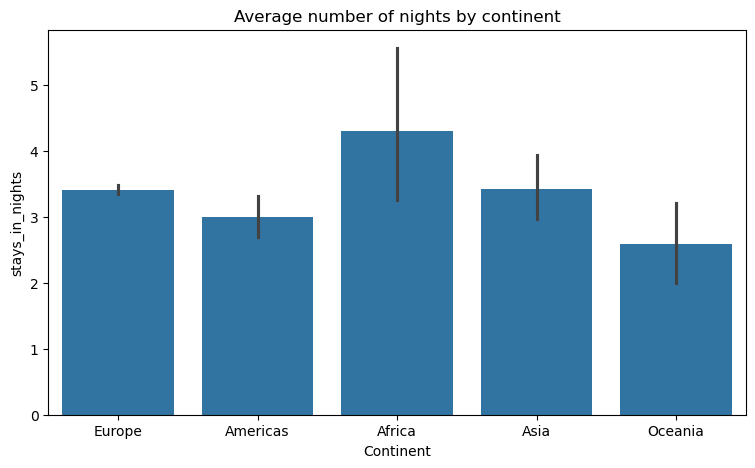

In [55]:
fig, ax = plt.subplots(figsize=[9,5])
sns.barplot(
    data=df_merged,
    x='Continent',
    y='stays_in_nights')

ax.set(title='Average number of nights by continent',
       xlabel='Continent',
       ylabel='stays_in_nights')
plt.show()


### Adr with others variables

In [56]:
# Top 10 countries with the higher ADR and with at leat 10 observations
df.groupby('country')['adr'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
LUX,14.0,146.177857,75.153637,70.2,93.3375,137.075,164.235,363.0
MAR,11.0,139.533636,55.444586,77.25,96.975,135.2,163.485,240.0
DNK,19.0,138.956316,53.183277,64.0,94.0,139.0,168.715,264.0
NOR,27.0,126.249259,35.782626,62.0,102.65,123.0,155.585,192.0
RUS,37.0,121.046216,48.07249,52.0,92.0,111.14,142.43,250.0
USA,73.0,118.697534,51.468159,0.0,81.0,101.83,144.45,290.0
BRA,88.0,118.351477,51.560502,0.0,88.4,105.35,146.6475,311.25
CHE,75.0,116.814533,49.548734,19.0,80.315,107.0,139.5,263.33
BEL,106.0,114.249245,40.16148,4.0,90.0625,113.25,135.85,226.5


In [57]:
# Top 10 countries with the lower ADR and with at leat 10 observations
df.groupby('country')['adr'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
PRT,2048.0,94.380557,49.69267,0.0,62.0,85.0,115.0,382.0
GBR,527.0,95.600474,46.284124,0.0,60.9,90.0,119.29,308.57
FIN,17.0,97.633529,36.027536,50.0,79.0,91.0,110.77,171.0
HUN,12.0,98.066667,18.625337,70.0,88.875,97.65,102.3,137.14
IRL,136.0,102.395515,49.297333,8.0,70.0,91.8,126.225,306.5
DEU,296.0,105.232905,36.995252,0.0,80.9375,101.225,124.2,259.0
SWE,31.0,107.859355,45.929801,0.0,75.835,110.0,136.15,221.33
POL,28.0,107.868214,42.873709,41.57,84.7275,102.65,121.725,231.6
ROU,26.0,108.587308,35.887139,54.0,88.0425,99.605,124.75,209.0


In [58]:
# By continent
df_merged.groupby('Continent')['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,36.0,103.305,47.438619,0.0,75.595,96.5,120.7775,240.0
Americas,191.0,118.516492,49.938591,0.0,85.75,105.0,148.2,311.25
Asia,172.0,110.852791,44.238555,0.0,79.185,102.03,135.0375,268.0
Europe,4577.0,101.649452,48.917051,0.0,68.0,93.5,125.0,382.0
Oceania,24.0,111.525417,41.9765,29.11,93.7075,112.67,129.3225,233.0


In [59]:
# By month
df.groupby('arrival_date_month')['adr'].describe()

/var/folders/l0/l3b41n5n00z588bsfcg0b5040000gn/T/ipykernel_1744/642118203.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('arrival_date_month')['adr'].describe()


,count,mean,std,min,25%,50%,75%,max
arrival_date_month,,,,,,,,
January,251.0,71.665458,28.115845,0.0,52.175,70.4,87.15,180.2
February,328.0,75.247988,31.136087,0.0,58.0,73.33,87.25,226.0
March,423.0,80.736288,33.824089,0.0,62.4,80.0,93.69,251.0
April,452.0,101.995863,37.954094,0.0,80.0,95.73,119.0,290.01
May,508.0,104.477323,41.781377,0.0,76.9025,105.0,130.0,285.17
June,462.0,117.388398,40.751688,0.0,91.9475,112.835,140.0,260.0
July,520.0,126.680058,52.227657,0.0,92.8875,115.0,152.895,363.0
August,585.0,143.030359,60.811561,0.0,99.21,134.5,181.0,349.67
September,470.0,108.263426,44.886189,0.0,77.0575,105.0,134.775,279.2


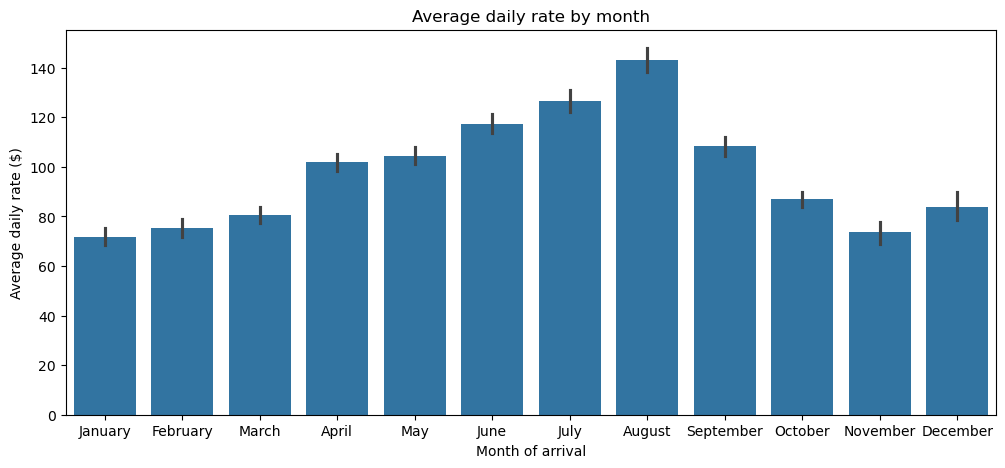

In [60]:
fig, ax = plt.subplots(figsize=[12,5])
sns.barplot(
    data=df,
    x='arrival_date_month',
    y='adr',
    estimator='mean',
)

ax.set(
    title='Average daily rate by month',
    xlabel='Month of arrival',
    ylabel='Average daily rate ($)'
)
plt.savefig("adr_month.png")

## What variables are associated the most with booking cancellations ?

In [61]:
# Split the dataset in two. This allows us to visually spot differences in the distributions.

Canceled_yes = df[(df['canceled']== 1 ) ]
Canceled_no = df[(df['canceled']== 0 ) ]

Canceled_yes.describe()

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,canceled,stays_in_nights
count,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0,1826.0
mean,27.163198,15.553122,0.876232,2.538883,1.903067,0.084885,107.402097,0.0,0.351041,1.0,3.415115
std,12.846136,8.871606,0.960031,1.703781,0.444043,0.39852,47.379934,0.0,0.66538,0.0,2.287709
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25%,17.0,8.0,0.0,1.0,2.0,0.0,75.0,0.0,0.0,1.0,2.0
50%,28.0,16.0,1.0,2.0,2.0,0.0,99.0,0.0,0.0,1.0,3.0
75%,37.0,23.0,2.0,3.0,2.0,0.0,130.0,0.0,1.0,1.0,4.0
max,53.0,31.0,6.0,19.0,3.0,5.0,382.0,0.0,4.0,1.0,25.0


In [62]:
Canceled_no.describe()

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,canceled,stays_in_nights
count,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0,3174.0
mean,27.003466,15.798047,0.924071,2.461563,1.83995,0.296156,99.947142,0.102394,0.702583,0.0,3.385633
std,13.912279,8.744933,0.976997,1.893876,0.502341,0.779022,49.524832,0.305286,0.832532,0.0,2.516631
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,15.0,8.0,0.0,1.0,2.0,0.0,67.87,0.0,0.0,0.0,2.0
50%,27.0,16.0,1.0,2.0,2.0,0.0,91.0,0.0,1.0,0.0,3.0
75%,38.0,24.0,2.0,3.0,2.0,0.0,123.26,0.0,1.0,0.0,4.0
max,53.0,31.0,8.0,20.0,4.0,18.0,349.67,2.0,5.0,0.0,28.0


### Average daily rate

In [63]:
df.groupby('canceled')['adr'].describe()


,count,mean,std,min,25%,50%,75%,max
canceled,,,,,,,,
0,3174.0,99.947142,49.524832,0.0,67.87,91.0,123.26,349.67
1,1826.0,107.402097,47.379934,0.0,75.0,99.0,130.0,382.0


In [64]:
# Compute the percentage difference between the mean of adr associated with a cancellation and a adr without cancellation.
(107.402097-99.947142)/ 99.947142 * 100

7.4588976241061475

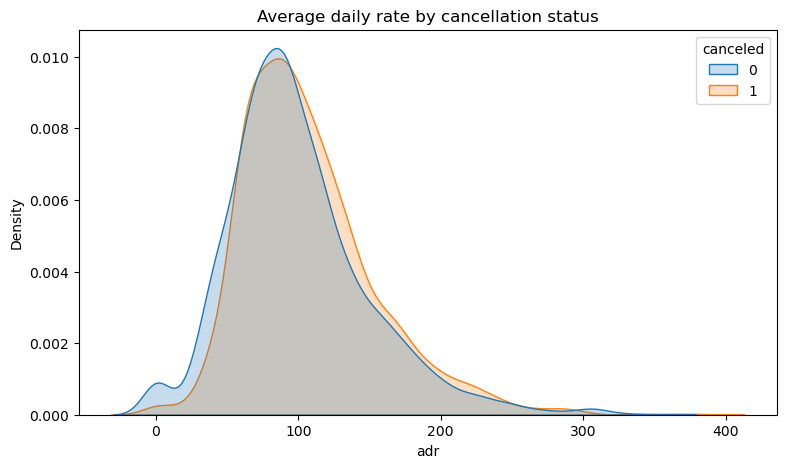

In [65]:
# Plot the ADR distribution for canceled = 0 and canceled = 1

fig, ax = plt.subplots(figsize=[9,5])
sns.kdeplot(
    data=df,
    x="adr",
    hue="canceled",
    common_norm=False,  
    fill=True
)
ax.set(title='Average daily rate by cancellation status')
plt.show()


### Others

/var/folders/l0/l3b41n5n00z588bsfcg0b5040000gn/T/ipykernel_1744/1360701696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_by_month = df.groupby('arrival_date_month')['canceled'].mean().reset_index()


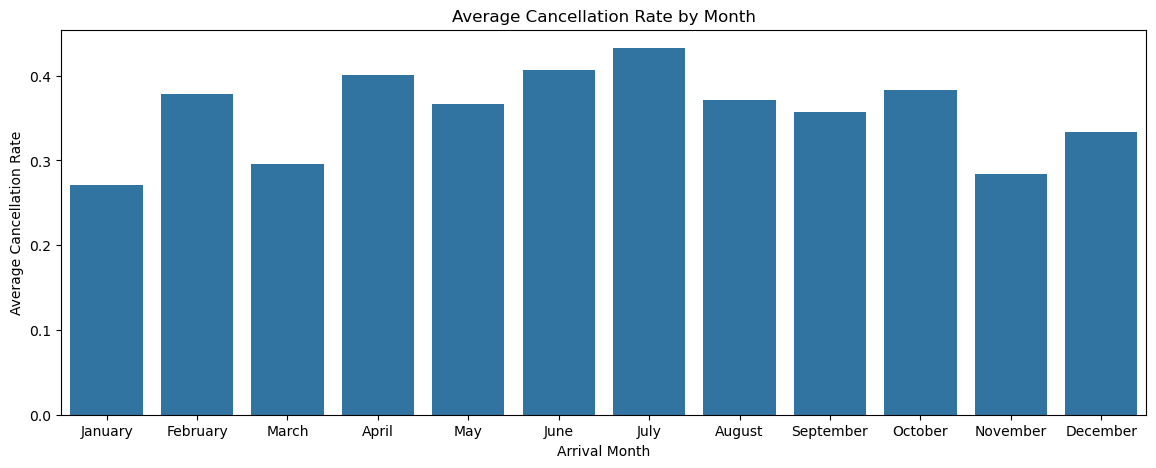

In [66]:
#  Cancellations By month
cancel_by_month = df.groupby('arrival_date_month')['canceled'].mean().reset_index()

fig, ax = plt.subplots(figsize=[14,5])
sns.barplot(
    data=cancel_by_month,
    x='arrival_date_month',
    y='canceled')

ax.set(title='Average Cancellation Rate by Month',
       xlabel='Arrival Month',
       ylabel='Average Cancellation Rate')
plt.show()

In [67]:
# By countries, calcaluate the top 10 average countries with the more cancellations with at least 10 observations
df.groupby('country')['canceled'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
PRT,2048.0,0.56543,0.495822,0.0,0.0,1.0,1.0,1.0
HUN,12.0,0.5,0.522233,0.0,0.0,0.5,1.0,1.0
RUS,37.0,0.459459,0.505228,0.0,0.0,0.0,1.0,1.0
MAR,11.0,0.454545,0.522233,0.0,0.0,0.0,1.0,1.0
LUX,14.0,0.428571,0.513553,0.0,0.0,0.0,1.0,1.0
BRA,88.0,0.397727,0.492233,0.0,0.0,0.0,1.0,1.0
ROU,26.0,0.384615,0.496139,0.0,0.0,0.0,1.0,1.0
ITA,159.0,0.36478,0.482889,0.0,0.0,0.0,1.0,1.0
POL,28.0,0.321429,0.475595,0.0,0.0,0.0,1.0,1.0


In [68]:
# By countries, calcaluate the top 10 average countries with the less cancellations with at least 10 observations
df.groupby('country')['canceled'].describe().query('count > 10', engine='python').sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
NLD,111.0,0.09009,0.287609,0.0,0.0,0.0,0.0,1.0
AUT,63.0,0.111111,0.316794,0.0,0.0,0.0,0.0,1.0
SWE,31.0,0.129032,0.340777,0.0,0.0,0.0,0.0,1.0
NOR,27.0,0.148148,0.362014,0.0,0.0,0.0,0.0,1.0
AUS,19.0,0.157895,0.374634,0.0,0.0,0.0,0.0,1.0
DEU,296.0,0.168919,0.375315,0.0,0.0,0.0,0.0,1.0
FIN,17.0,0.176471,0.392953,0.0,0.0,0.0,0.0,1.0
FRA,410.0,0.185366,0.389069,0.0,0.0,0.0,0.0,1.0
BEL,106.0,0.198113,0.400471,0.0,0.0,0.0,0.0,1.0


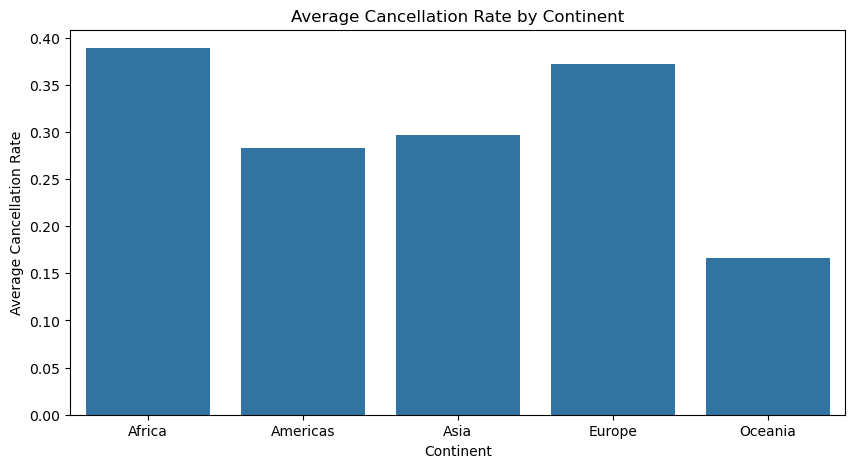

In [69]:
# Cancellations By continent

cancel_by_continent = df_merged.groupby('Continent')['canceled'].mean().reset_index()

fig, ax = plt.subplots(figsize=[10,5])
sns.barplot(
    data=cancel_by_continent,
    x='Continent',
    y='canceled',
)
ax.set(
    title='Average Cancellation Rate by Continent',
    xlabel='Continent',
    ylabel='Average Cancellation Rate'
)
plt.show()


### Correlation

In [70]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


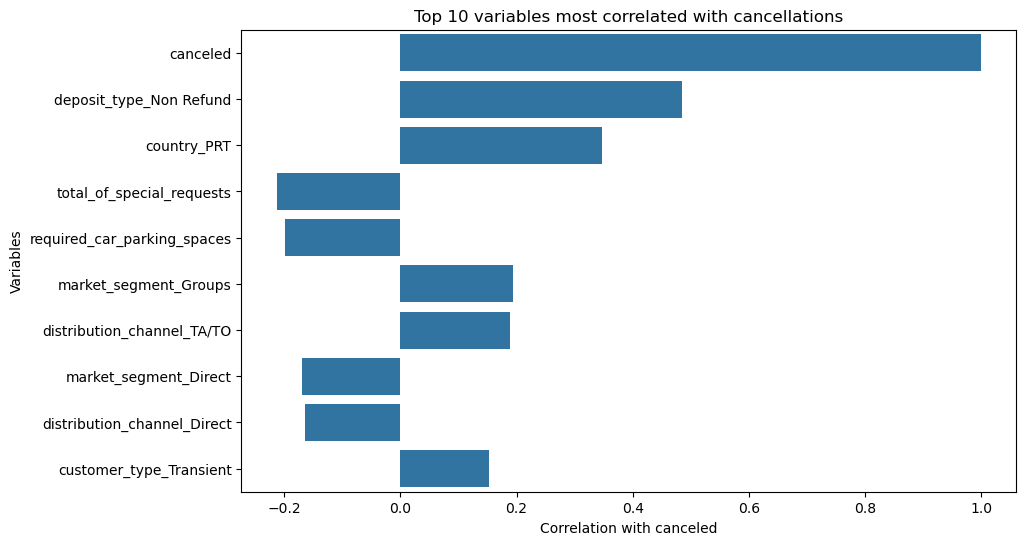

In [71]:
# Correlation between all variables and the target "canceled"
corr_canceled = df_encoded.corr()['canceled'].sort_values(ascending=False)

# Select the Top 10 most correlated variables (in absolute value)
top_corr = corr_canceled.abs().sort_values(ascending=False).head(10)
top_corr_values = corr_canceled[top_corr.index]

plt.figure(figsize=(10,6))
sns.barplot(x=top_corr_values.values, y=top_corr_values.index)
plt.xlabel('Correlation with canceled')
plt.ylabel('Variables')
plt.title('Top 10 variables most correlated with cancellations')
plt.show()

In [72]:
# Look at the most correlated variables

In [73]:
# Deposit_type (more correlated) with cancellation.
df.groupby('deposit_type')['canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,4396.0,0.279345,0.448728,0.0,0.0,0.0,1.0,1.0
Non Refund,600.0,0.996667,0.057687,0.0,1.0,1.0,1.0,1.0
Refundable,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
pd.crosstab(df['deposit_type'], df['canceled'])


canceled,0,1
deposit_type,,
No Deposit,3168,1228
Non Refund,2,598
Refundable,4,0


In [75]:

df.groupby('required_car_parking_spaces')['canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
required_car_parking_spaces,,,,,,,,
0,4677.0,0.390421,0.487897,0.0,0.0,0.0,1.0,1.0
1,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.groupby('total_of_special_requests')['canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
total_of_special_requests,,,,,,,,
0,2938.0,0.461198,0.498577,0.0,0.0,0.0,1.0,1.0
1,1393.0,0.232592,0.422636,0.0,0.0,0.0,0.0,1.0
2,542.0,0.234317,0.423963,0.0,0.0,0.0,0.0,1.0
3,116.0,0.146552,0.355193,0.0,0.0,0.0,0.0,1.0
4,9.0,0.333333,0.5,0.0,0.0,0.0,1.0,1.0
5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
mean_cancel_request = df[df['total_of_special_requests'] >= 1]['canceled'].mean()
mean_cancel_no_request = df[df['total_of_special_requests'] < 1]['canceled'].mean()

print('The cancellation rate when there is at least one request is', round(mean_cancel_request*100, 2), '%')
print('The cancellation rate when no request has been made is', round(mean_cancel_no_request*100, 2), '%')


The cancellation rate when there is at least one request is 22.84 %
The cancellation rate when no request has been made is 46.12 %


## Machine learning classification model 

In [78]:
#We are going to try to predict the cancelation with a random forest model using skicit learn

In [79]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [80]:
X=df.drop(columns=["canceled"])
y=df["canceled"]

In [81]:
X2= pd.get_dummies(X, drop_first=True)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.3, random_state=42
)


In [83]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [84]:
print("Depth of the tree :", tree.get_depth())
print("Number of leaves :", tree.get_n_leaves())

Depth of the tree : 35
Number of leaves : 577


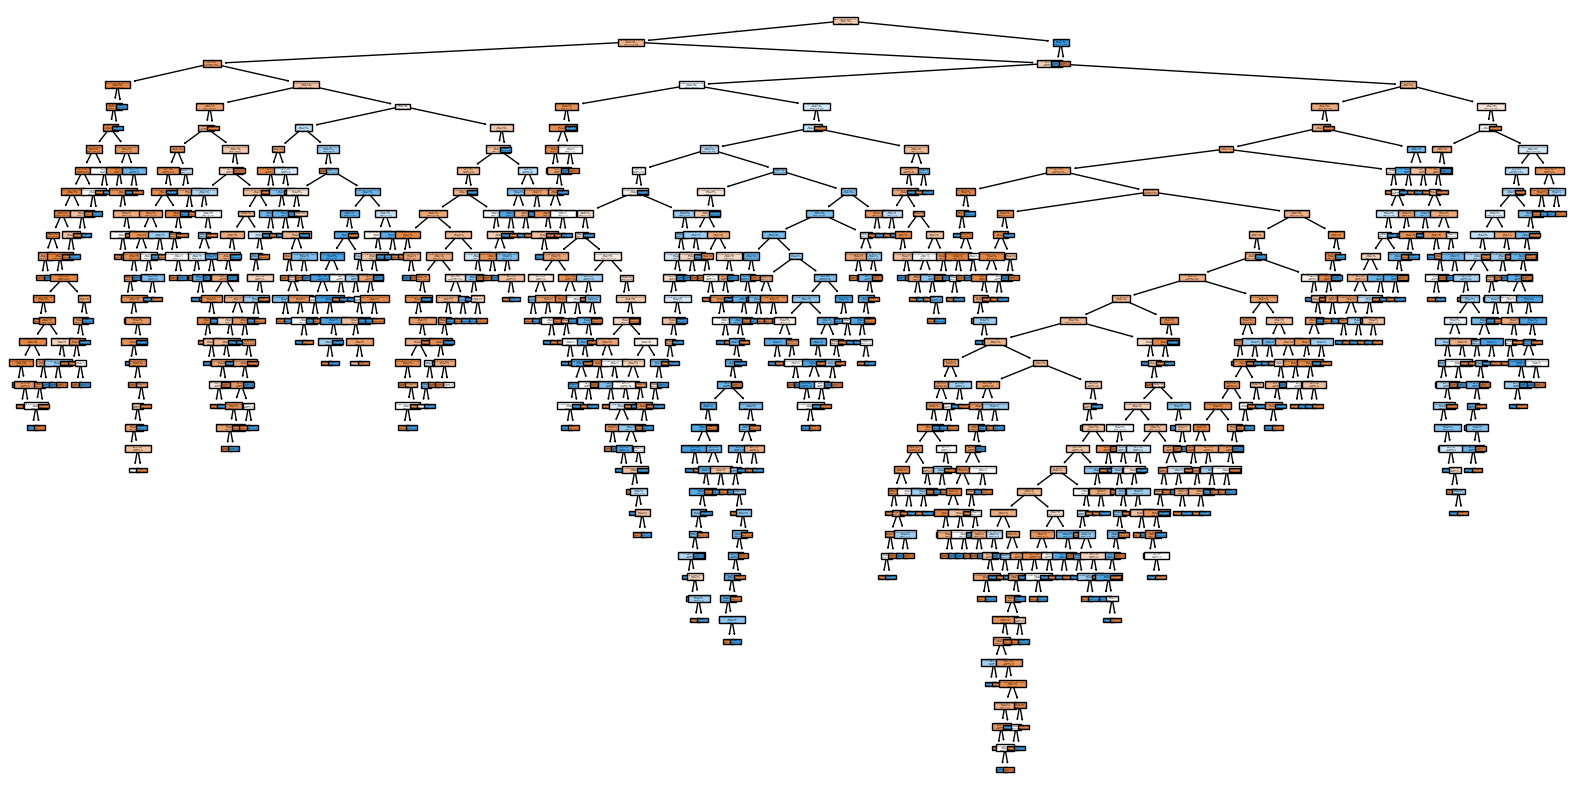

In [85]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X2.columns, filled=True)
plt.show()

In [86]:
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

print("Train accuracy :", accuracy_score(y_train, train_pred))
print("Test accuracy  :", accuracy_score(y_test, test_pred))

Train accuracy : 0.9985714285714286
Test accuracy  : 0.7806666666666666


In [87]:
#Way too big tree, nothing is readable and clearly overfitted
#Let's try a smallest tree
tree2 = DecisionTreeClassifier(random_state=42, min_samples_split=8, max_depth=10)
tree2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


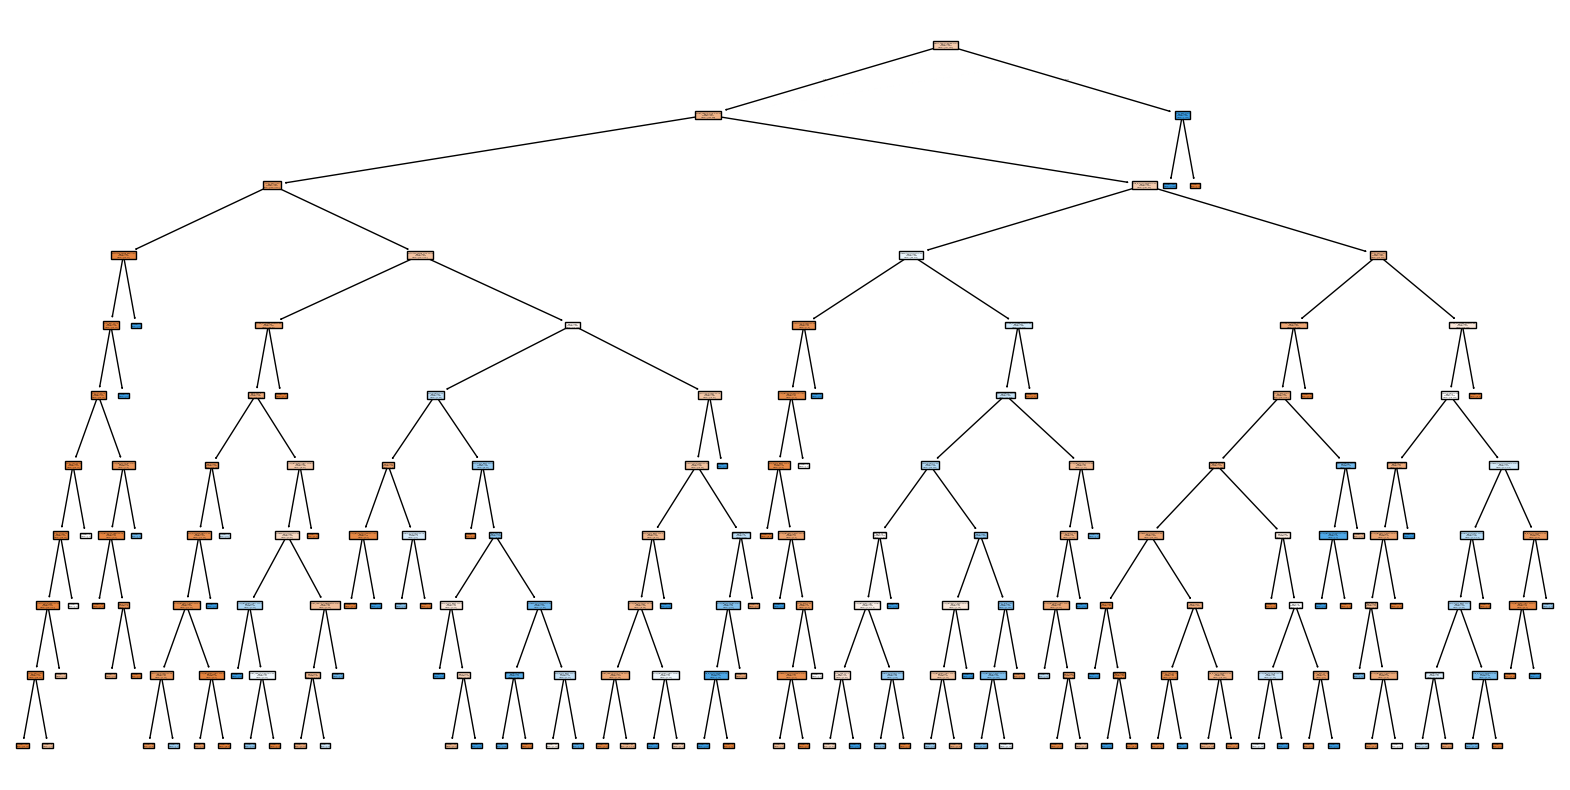

In [88]:
plt.figure(figsize=(20,10))
plot_tree(tree2, feature_names=X2.columns, filled=True)
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=10,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

print("Best hyperparameters :", grid.best_params_)
print("Best accuracy on y_train :", grid.best_score_)

Best hyperparameters : {'max_depth': 10, 'min_samples_split': 2}
Best accuracy on y_train : 0.7934285714285714


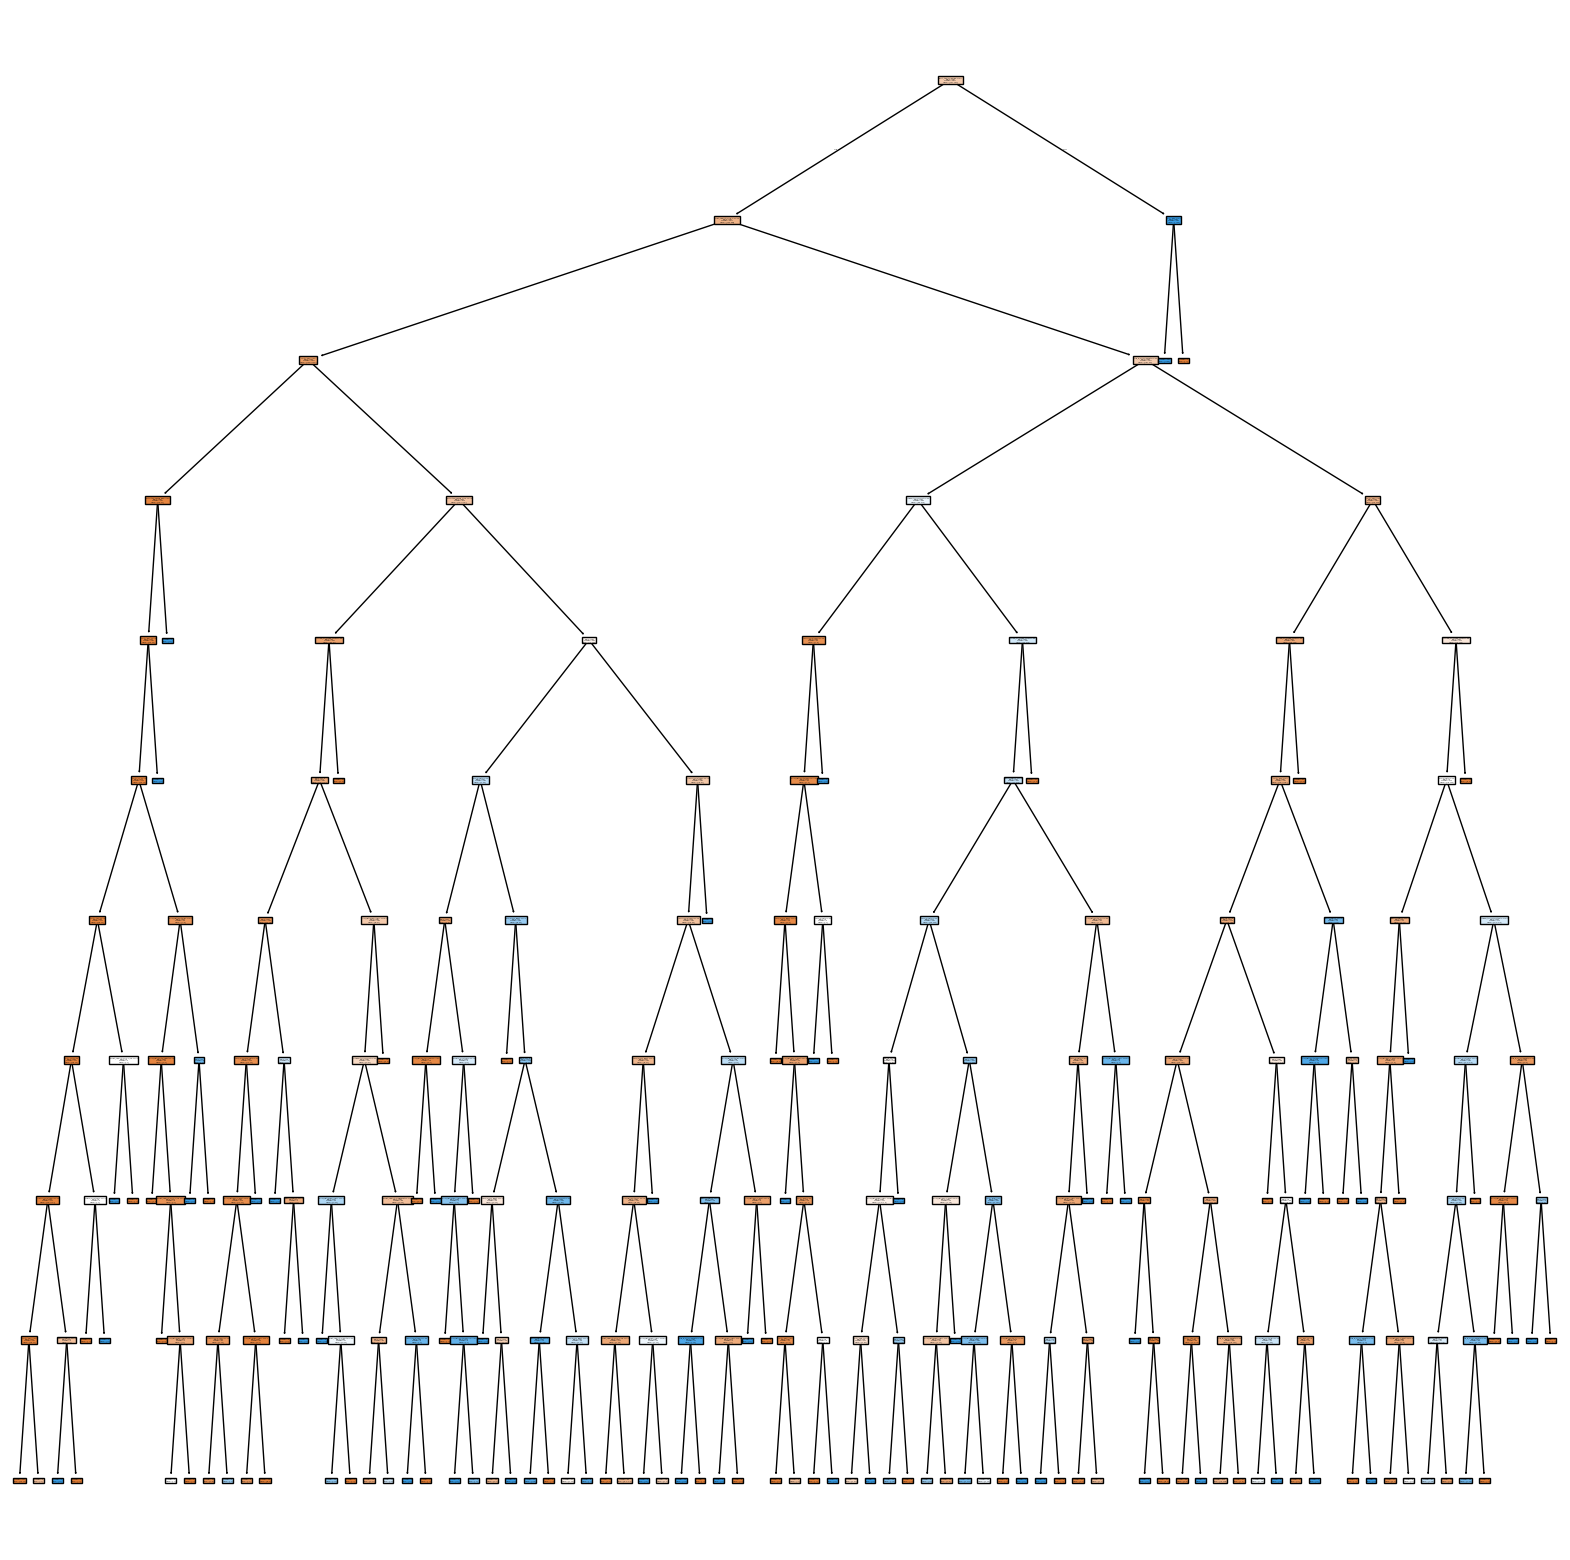

In [90]:
#Display this tree
tree3 = DecisionTreeClassifier(random_state=42, min_samples_split=2, max_depth=10)
tree3.fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(tree3, feature_names=X2.columns, filled=True)
plt.show()

# + confusion matrice et donc interpretation des résuçltats

In [91]:
#Deposit_type could be wrong so we test without it
X3=X.drop(columns=['deposit_type'])
X3= pd.get_dummies(X3, drop_first=True) #one hot encoding

In [92]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X3, y, test_size=0.3, random_state=42
)
tree4 = DecisionTreeClassifier(random_state=42, max_depth=12, min_samples_split=5)
tree4.fit(X_train4, y_train4)

y_pred_train4 = tree4.predict(X_train4)
y_pred_test4 = tree4.predict(X_test4)

print("Train accuracy :", accuracy_score(y_train, y_pred_train4))
print("Test accuracy  :", accuracy_score(y_test4, y_pred_test4))

Train accuracy : 0.89
Test accuracy  : 0.792


In [93]:
#New test for the new dataset without deposit_type
param_grid = {
    'max_depth': list(range(5, 21)),          #5 to 20
    'min_samples_split': list(range(2,10))        #2 to 10
}

#Same method as before
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,                  
    scoring='accuracy',     
    n_jobs=-1               
)
grid.fit(X_train4, y_train4)

print("Best hyperparameters :", grid.best_params_)
print("Best accuracy for y_train :", grid.best_score_)

Best hyperparameters : {'max_depth': 10, 'min_samples_split': 7}
Best accuracy for y_train : 0.7985714285714286


In [94]:
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test4, y_test4)
print("Accuracy on y_test for the best hyperparameters:", test_accuracy)

Accuracy on y_test for the best hyperparameters: 0.7986666666666666


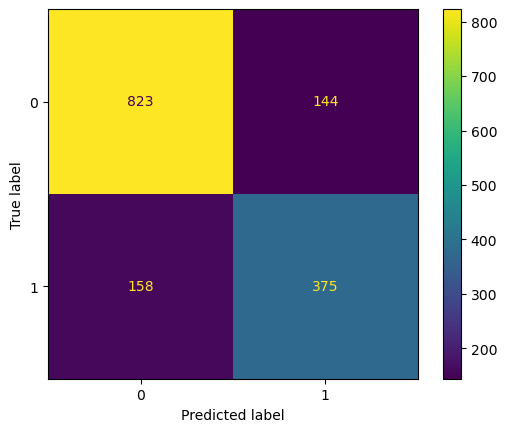

In [95]:
y_pred = best_model.predict(X_test4)
cm = confusion_matrix(y_test4, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(
) 